<h1 style="text-align: center;"><strong>Hearth Attack Prediction</strong></h1>
<p style="text-align: center;"><strong>Kevin Milli</strong></p>

<center>
    <img src="img.jpeg" width="300" alt="hearth logo">
</center>

<a id="Objective"></a>
<h2 style="text-align: center;"><strong>Objectives</strong></h2>

I want to start a data research using a *Kaggle* dataset called the [Heart Attack Analysis & Prediction Dataset](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/discussion). 

The **objective** is to begin with an initial exploration, and then proceed with classification. 

The **goal** is to determine, based on the data listed in the dataframe, whether an individual will or will not have a heart attack.

---

<a id="Setup"></a>
<h2 style="text-align: center;"><strong>Setup</strong></h2>

1. Pandas<br>
2. Numpy<br>
3. Matplotlib<br>
4. Seaborn<br>
5. scikit-learn<br>

---

<a id="Data-Description"></a>
<h2 style="text-align: center;"><strong>Data Description</strong></h2>


<ol>
    <li><strong>Age:</strong> Age of the patient</li>
    <li><strong>Sex:</strong> Sex of the patient</li>
    <li><strong>cp:</strong> Chest pain type
        <ul>
            <li>Value 1: typical angina</li>
            <li>Value 2: atypical angina</li>
            <li>Value 3: non-anginal pain</li>
            <li>Value 4: asymptomatic</li>
        </ul>
    </li>
    <li><strong>trtbps:</strong> Resting blood pressure (in mm Hg)</li>
    <li><strong>chol:</strong> Cholesterol in mg/dL fetched via BMI sensor</li>
    <li><strong>fbs:</strong> Fasting blood sugar > 120 mg/dL
        <ul>
            <li>1: true</li>
            <li>0: false</li>
        </ul>
    </li>
    <li><strong>restecg:</strong> Resting electrocardiographic results
        <ul>
            <li>Value 0: normal</li>
            <li>Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)</li>
            <li>Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria</li>
        </ul>
    </li>
    <li><strong>thalach:</strong> Maximum heart rate achieved</li>
    <li><strong>exng:</strong> Exercise-induced angina
        <ul>
            <li>1: yes</li>
            <li>0: no</li>
        </ul>
    </li>
    <li><strong>old peak:</strong> ST depression induced by exercise relative to rest</li>
    <li><strong>slp:</strong> the slope of the peak exercise ST segment
        <ul>
            <li>0: unsloping</li>
            <li>1: flat</li>
            <li>2: downsloping</li>
        </ul>
    </li>
    <li><strong>caa:</strong> Number of major vessels (0-3)</li>
    <li><strong>thall:</strong> thalassemia</li>
    <li><strong>target:</strong>
        <ul>
            <li>0: less chance of heart disease</li>
            <li>1: more chance of heart attack</li>
        </ul>
    </li>
</ol>

---

<h2 style="text-align: center;"><strong>Table of contents</strong></h2>

[1. Objectives](#Objective)<br>
[2. Setup](#Setup)<br>
[3. Data Description](#Data-Description)<br>
[4. Tools and Functions](#FeatureEngineering)<br>
[5. Exploratory Data Analysis and Feature Engineering](#EDA)<br>
[6. Data Preprocessing](#DataPreprocessing)<br>
[7. Model Evaluation](#ModelEvaluation)<br>
[8. Hyper Parameter Tuning](#HyperParameterTuning)<br>
[9. Final Model](#FinalModel)<br>
[10. Conclusions](#Conclusions)

---

### Imports

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, roc_curve, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set()
warnings.filterwarnings('ignore')

### Data

In [3]:
df = pd.read_csv('heart.csv')
df.head(3)

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1

In [4]:
df.dtypes.value_counts()

int64      13
float64     1
Name: count, dtype: int64

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<a id="ToolsFunction"></a>
<h2 style="text-align: center;"><strong>Tools and Functions</strong></h2>

In [6]:
def split_data(X, y, test_size=0.4, val_size=0.5, random_state=42):
    """
    The split_data function is designed to simplify 
    the process of dividing a dataset into three parts: 
        - training set, validation set, and test set.
    
    Method: StratifiedShuffleSplit
    
    Parameters:
    
        X: The feature DataFrame, the dataset to be split.
        y: The Series or array of labels corresponding to the features in the dataset.
        test_size (default=0.4): The proportion of the dataset to allocate as the test set.
        val_size (default=0.5): The proportion of the test set to allocate as the validation set.
        random_state (default=42): The seed for data splitting reproducibility.
        
    Output: X_train, X_val, X_test, y_train, y_val, y_test
"""

    splitter = StratifiedShuffleSplit(random_state=random_state, test_size=test_size, n_splits=1)
    
    for train_idx, test_idx in splitter.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    splitter2 = StratifiedShuffleSplit(random_state=random_state, test_size=val_size, n_splits=1)
    
    for train_idx, val_idx in splitter2.split(X_test, y_test):
        X_test, X_val = X_test.iloc[train_idx], X_test.iloc[val_idx]
        y_test, y_val = y_test.iloc[train_idx], y_test.iloc[val_idx]
    
    return X_train, X_val, X_test, y_train, y_val, y_test

In [7]:
def find_outliers(data, column=None, threshold=2):
    # First quartile (25%) and the third quartile (75%) of the column data
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    
    # Interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Lower and Upper bounds for outliers
    lower_limit = Q1 - threshold * IQR
    upper_limit = Q3 + threshold * IQR
    
    # Find the outliers within the specified column
    outliers = data[(data[column] < lower_limit) | (data[column] > upper_limit)]
    
    return outliers


<a id="FeatureEngineering"></a>
<h2 style="text-align: center;"><strong>Feature Engineering</strong></h2>

In [8]:
cp_mapping = {0: 'typical angina',
              1: 'atypical angina',
              2: 'non-anginal pain',
              3: 'asymptomatic'}
df['cp'] = df['cp'].map(cp_mapping)

slp_mapping = {0: 'unsloping',
               1: 'flat',
               2: 'downsloping'}
df['slp'] = df['slp'].map(slp_mapping)

thall_mapping = {1: 'fixed defect',
                 2: 'normal',
                 3: 'reversible defect'}
df['thall'] = df['thall'].map(thall_mapping)

rest_ecg_mapping = {0: 'normal',
                    1: 'ST-T wave abnormality',
                    2: 'left ventricular hypertrophy'}
df['restecg'] = df['restecg'].map(rest_ecg_mapping)

sex_mapping = {1: 'male',
               0: 'female'}
df['sex'] = df['sex'].map(sex_mapping)

<a id="EDA"></a>
<h2 style="text-align: center;"><strong>Exploratory Data Analysis and Feature Engineering</strong></h2>

In [9]:
df.duplicated().sum()

1

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
print(f"Dtypes: \n{df.dtypes.value_counts()}\n{'='*50}\n")
df.info()

Dtypes: 
int64      8
object     5
float64    1
Name: count, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    object 
 2   cp        302 non-null    object 
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    object 
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    object 
 11  caa       302 non-null    int64  
 12  thall     300 non-null    object 
 13  output    302 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 35.4+ KB


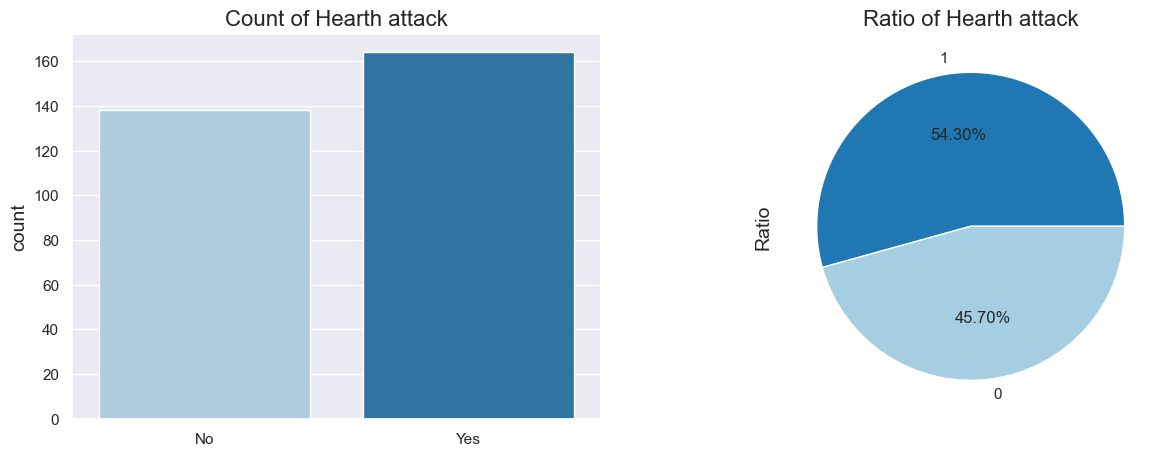

In [12]:
labels = ['No', 'Yes',]
palette = sns.color_palette('Paired') 

fig, axs = plt.subplots(1,2, figsize=(15, 5))
ax = sns.countplot(data=df, 
                   x=df['output'],
                   ax = axs[0], 
                   palette='Paired');

axs[0].set_ylabel('count', fontsize=14)
axs[0].set_title("Count of Hearth attack", fontsize=16)
axs[0].set_xticks([0,1], labels)
axs[0].set_xlabel("")

ax2 = df['output'].value_counts().plot.pie(explode=[0,0], 
                                             colors=[palette[1], palette[0]],
                                             ax=axs[1],
                                             autopct='%.2f%%');

axs[1].set_title("Ratio of Hearth attack", fontsize=16)
axs[1].set_ylabel('Ratio', fontsize=14);

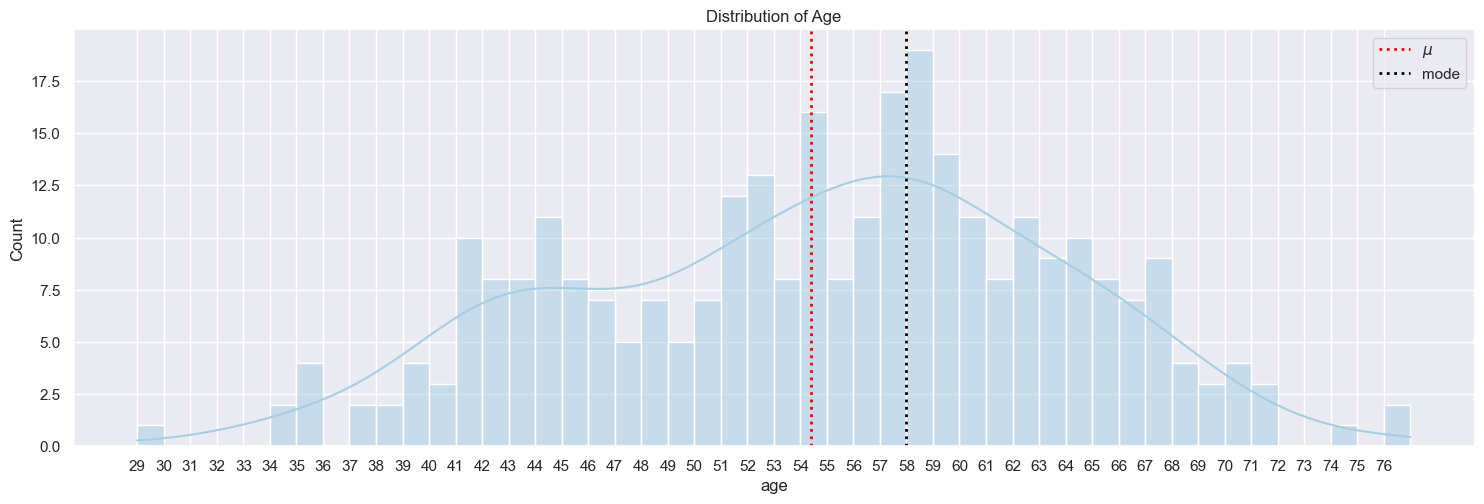

In [13]:
sns.set_palette('Paired')
sns.displot(data=df, x='age', kde=True, aspect=3, bins=48, palette='Paired')
plt.axvline(df.age.mean(), color='red', linestyle=':', label='$\mu$', linewidth=2)
plt.axvline(df.age.mode().values, color='black', linestyle=':', label='mode', linewidth=2)
plt.title("Distribution of Age")
plt.legend()
plt.xticks(list(range(29,77)));

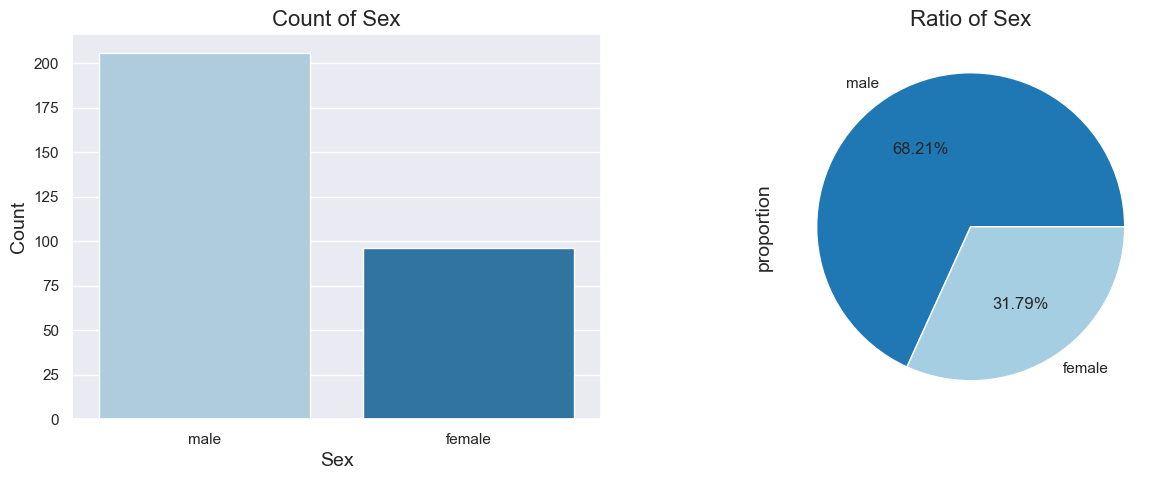

In [14]:
palette = sns.color_palette('Paired') 

fig, axs = plt.subplots(1,2, figsize=(15, 5))
ax = sns.countplot(data=df, 
                   x=df['sex'],
                   ax = axs[0], 
                   palette='Paired');

ax.set_xlabel('Sex', fontsize=14)
axs[0].set_ylabel('Count', fontsize=14)
axs[0].set_title("Count of Sex", fontsize=16)

ax2 = df['sex'].value_counts().plot.pie(explode=[0,0], 
                                             colors=[palette[1], palette[0]],
                                             ax = axs[1],
                                             autopct='%.2f%%');

axs[1].set_title("Ratio of Sex", fontsize=16)
axs[1].set_ylabel('proportion', fontsize=14);

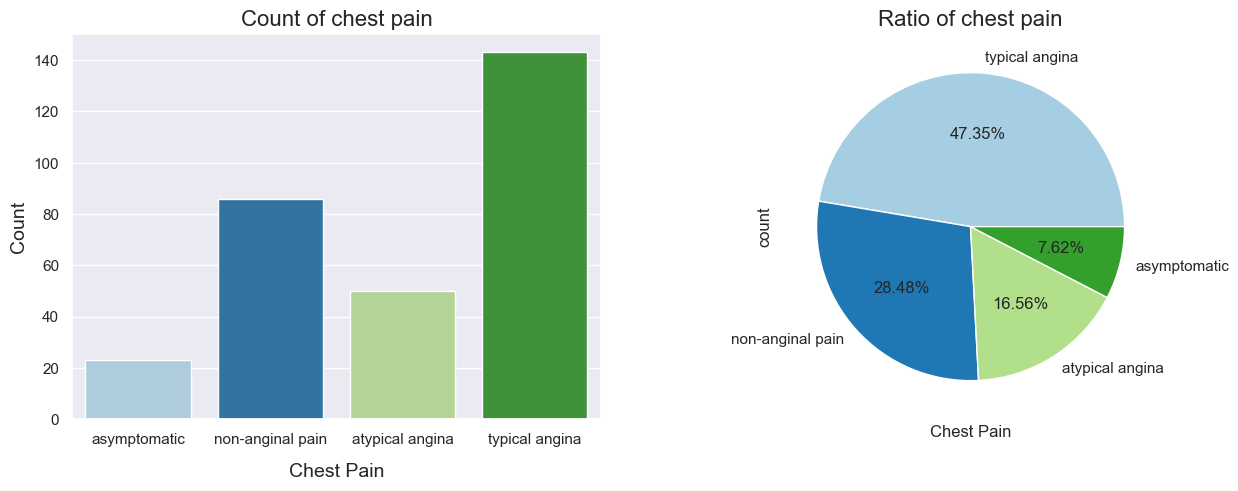

In [15]:
sns.set_palette('Paired')

# Crea il grafico a barre
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

ax = sns.countplot(data=df, x=df['cp'], ax=axs[0])

ax.set_xlabel('cp', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
axs[0].set_title("Count of chest pain", fontsize=16)
axs[0].set_xlabel("Chest Pain", labelpad=12)

# Crea il grafico a torta
explode = [0, 0, 0, 0]  # Imposta l'esplosione solo per la seconda fetta
colors = sns.color_palette('Paired')
ax2 = df['cp'].value_counts().plot.pie(explode=explode, colors=colors, ax=axs[1], autopct='%.2f%%')

axs[1].set_title("Ratio of chest pain", fontsize=16)
axs[1].set_xlabel("Chest Pain")

plt.show()

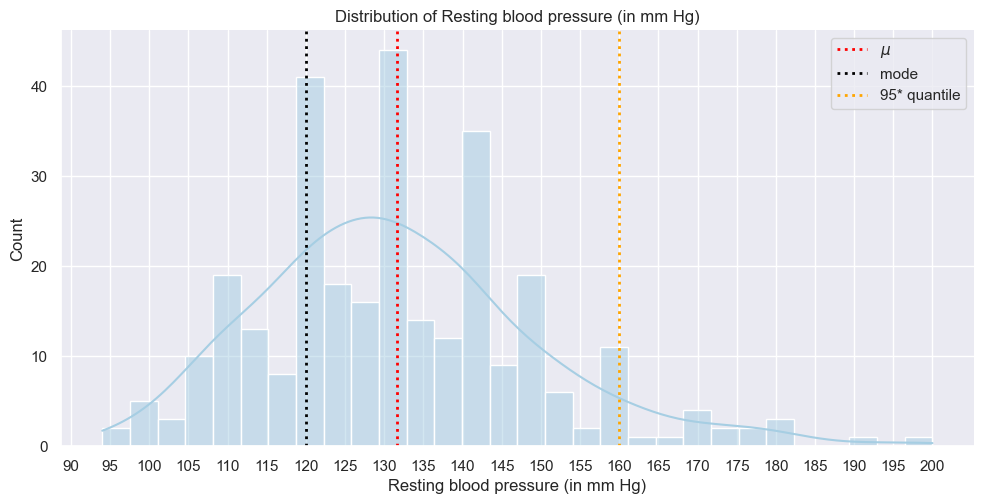

In [16]:
# trtbps = Resting blood pressure (in mm Hg)

sns.set_palette('Paired')
sns.displot(data=df, x='trtbps', kde=True, aspect=2, bins=30, palette='Paired')
plt.axvline(df.trtbps.mean(), color='red', linestyle=':', label='$\mu$', linewidth=2)
plt.axvline(df.trtbps.mode().values, color='black', linestyle=':', label='mode', linewidth=2)
plt.axvline(df.trtbps.quantile(.95), color='orange', linestyle=':', label='95* quantile', linewidth=2)
plt.legend()
plt.title('Distribution of Resting blood pressure (in mm Hg)')
plt.xlabel('Resting blood pressure (in mm Hg)')
plt.xticks(list(range(90,201, 5)));

* Normal **resting blood pressure** levels vary, but they are typically considered in the range of 120-80 mm Hg.
* With values above 140-90 mm Hg considered high (hypertension).

In [17]:
print("Skewness: %f" % df['trtbps'].skew())

Skewness: 0.716541


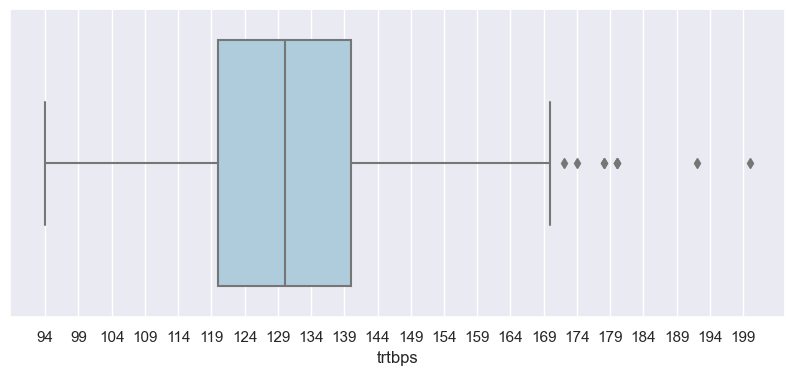

In [18]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='trtbps')
plt.xticks(list(range(df.trtbps.min(), df.trtbps.max(), 5)));

**Data Normaliztion Number 1 - Outlier Handling**

---

The idea behind this transformation is to avoid losing the limited data we have while also preserving the fact that the individual subject had a high value. This way, I allowed it to remain an outlier but simply 'scaled' to the values of the distribution.

In [19]:
df.loc[223,'trtbps'] = df.trtbps.quantile(.99)
df.loc[248,'trtbps'] = df.trtbps.quantile(.99)

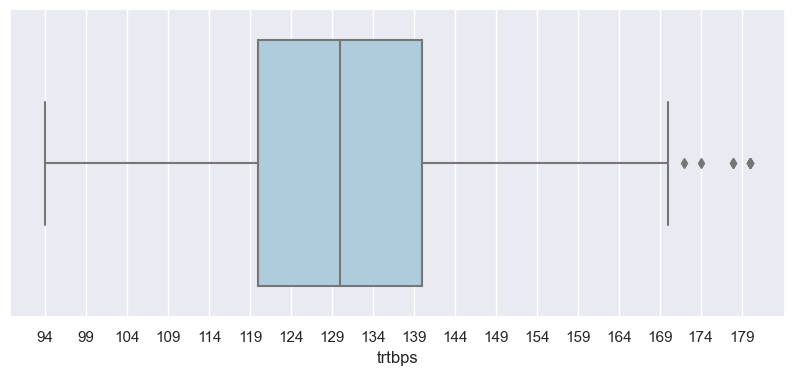

In [20]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='trtbps')
plt.xticks(list(range(df.trtbps.min(), df.trtbps.max(), 5)));

In [21]:
find_outliers(df, column='trtbps') # threshold set to 2.0

Empty DataFrame
Columns: [age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall, output]
Index: []

In [87]:
print("Skewness: %f" % df['trtbps'].skew())

Skewness: 0.573939


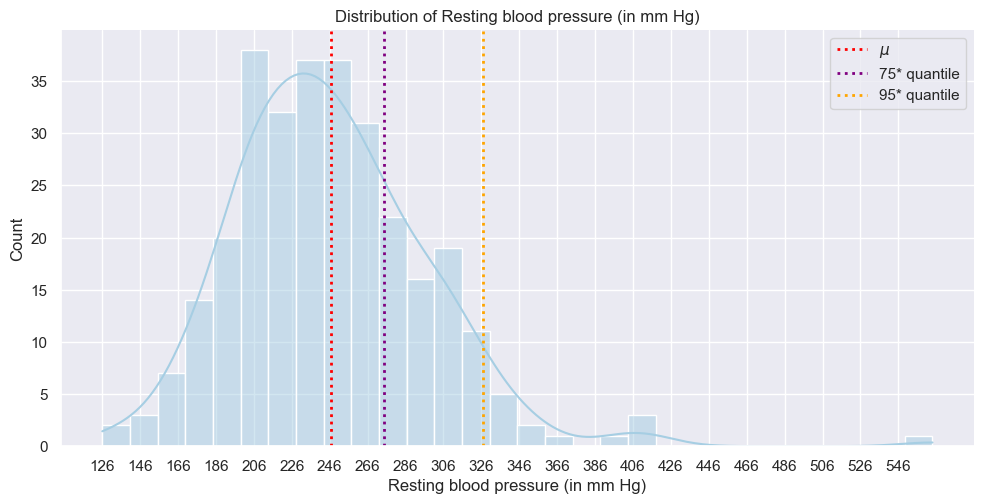

In [22]:
# chol = Cholesterol in mg/dL fetched via BMI sensor

sns.set_palette('Paired')
sns.displot(data=df, x='chol', kde=True, aspect=2, bins=30, palette='Paired')
plt.axvline(df.chol.mean(), color='red', linestyle=':', label='$\mu$', linewidth=2)
plt.axvline(df.chol.quantile(.75), color='purple', linestyle=':', label='75* quantile', linewidth=2)
plt.axvline(df.chol.quantile(.95), color='orange', linestyle=':', label='95* quantile', linewidth=2)
plt.legend()
plt.title('Distribution of Resting blood pressure (in mm Hg)')
plt.xlabel('Resting blood pressure (in mm Hg)')
plt.xticks(list(range(df.chol.min(), df.chol.max(), 20)));

In [23]:
print("Skewness: %f" % df['chol'].skew())

Skewness: 1.147332


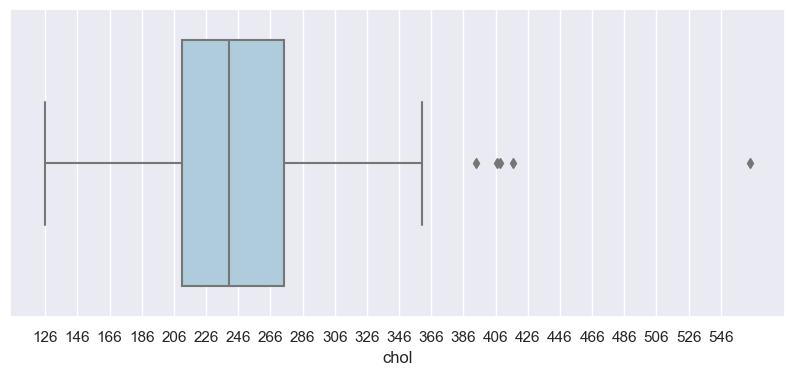

In [24]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='chol')
plt.xticks(list(range(df.chol.min(), df.chol.max(), 20)));

**Data Normaliztion Number 2 - outlier handling**

---
Same as above, We don't want to lose the information, and we don't want to penalize the individual subject, so we move it to the second highest value in the distribution.

In [25]:
df.loc[85,'chol'] = df.chol.quantile(.99)

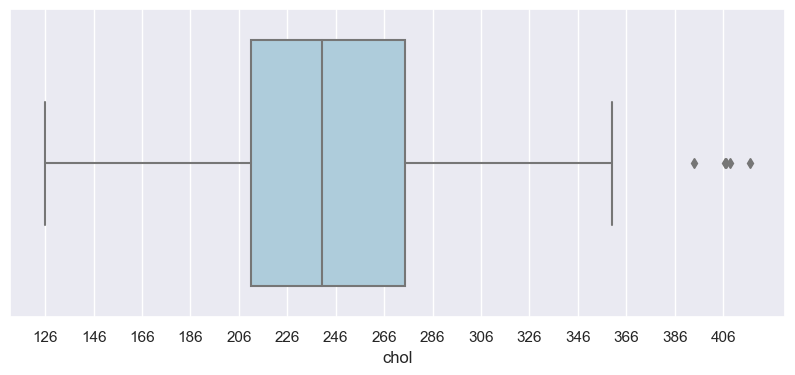

In [26]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='chol')
plt.xticks(list(range(int(df.chol.min()), int(df.chol.max()), 20)));

In [27]:
find_outliers(df, column='chol', threshold=2) 

age     sex                cp  trtbps    chol  fbs restecg  thalachh  \
28    65  female  non-anginal pain     140  417.00    1  normal       157   
85    67  female  non-anginal pain     115  406.87    0  normal       160   
220   63  female    typical angina     150  407.00    0  normal       154   
246   56  female    typical angina     134  409.00    0  normal       150   

     exng  oldpeak          slp  caa              thall  output  
28      0      0.8  downsloping    1             normal       1  
85      0      1.6         flat    0  reversible defect       1  
220     0      4.0         flat    3  reversible defect       0  
246     1      1.9         flat    2  reversible defect       0

In [86]:
print("Skewness: %f" % df['chol'].skew())

Skewness: 0.581584


* Before further scaling the data, I conduct an analysis of the machine learning models; in case the outcome is not satisfactory, I proceed to scale this data.

---

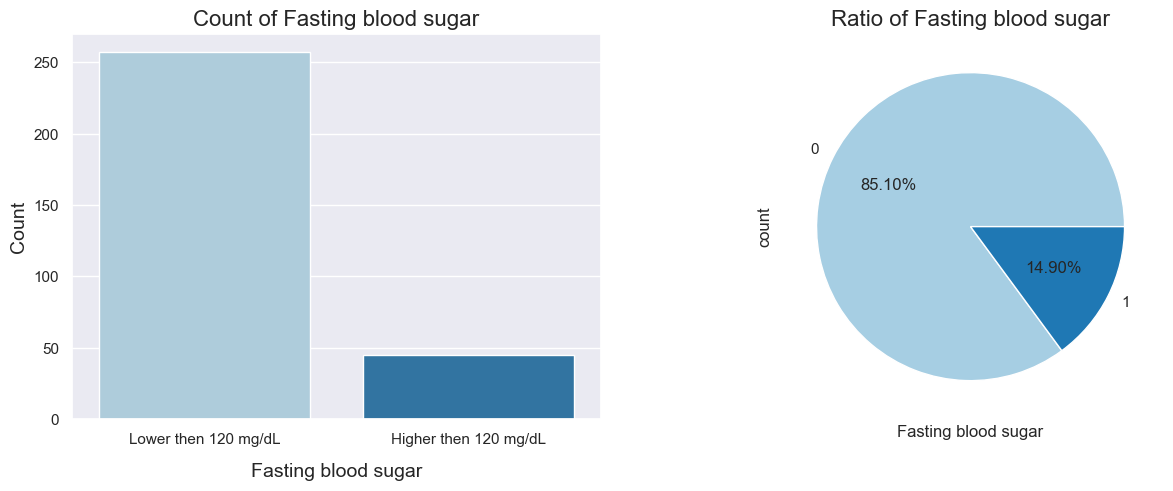

In [28]:
# fbs = Fasting blood sugar > 120 mg/dL   
# Output:[Binary] 0,1

labels = ['Lower then 120 mg/dL', 'Higher then 120 mg/dL',]

sns.set_palette('Paired')

# Bar Chart
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

ax = sns.countplot(data=df, x=df['fbs'], ax=axs[0])

ax.set_xlabel('Fasting blood sugar', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
axs[0].set_title("Count of Fasting blood sugar", fontsize=16)
axs[0].set_xticks([0, 1], labels)
axs[0].set_xlabel("Fasting blood sugar", labelpad=12)

# Pie Chart
explode = [0, 0,]  
colors = sns.color_palette('Paired')
ax2 = df['fbs'].value_counts().plot.pie(explode=explode, colors=colors, ax=axs[1], autopct='%.2f%%')

axs[1].set_title("Ratio of Fasting blood sugar", fontsize=16)
axs[1].set_xlabel("Fasting blood sugar")

plt.show()

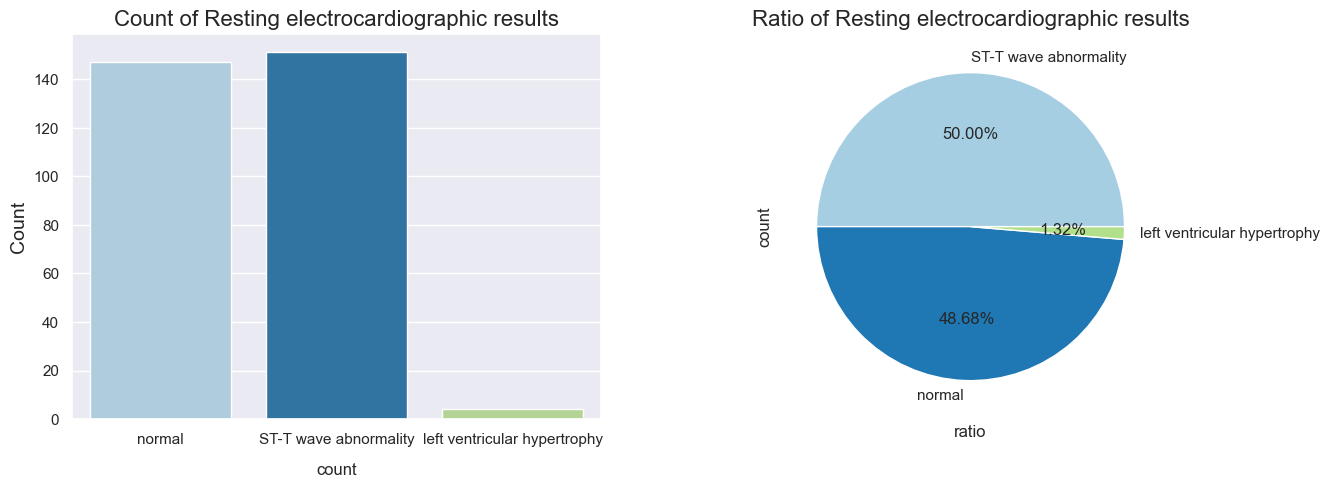

In [29]:
# restecg: Resting electrocardiographic results
#Value 0: normal
#Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
#Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
sns.set_palette('Paired')

# Bar Chart
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

ax = sns.countplot(data=df, x=df['restecg'], ax=axs[0])

ax.set_ylabel('Count', fontsize=14)
axs[0].set_title("Count of Resting electrocardiographic results", fontsize=16)
axs[0].set_xlabel("count", labelpad=12)

# Pie Chart
explode = [0, 0, 0]  
colors = sns.color_palette('Paired')
ax2 = df['restecg'].value_counts().plot.pie(explode=explode, colors=colors, ax=axs[1], autopct='%.2f%%')

axs[1].set_title("Ratio of Resting electrocardiographic results", fontsize=16)
axs[1].set_xlabel("ratio")

plt.show()

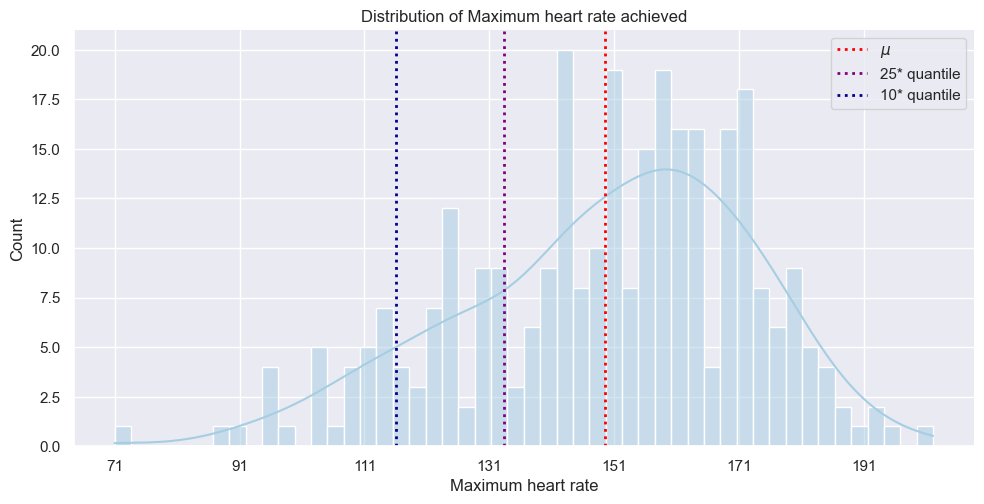

In [30]:
# thalach: Maximum heart rate achieved

sns.set_palette('Paired')
sns.displot(data=df, x='thalachh', kde=True, aspect=2, bins=50, palette='Paired')
plt.axvline(df.thalachh.mean(), color='red', linestyle=':', label='$\mu$', linewidth=2)
plt.axvline(df.thalachh.quantile(.25), color='purple', linestyle=':', label='25* quantile', linewidth=2)
plt.axvline(df.thalachh.quantile(.10), color='darkblue', linestyle=':', label='10* quantile', linewidth=2)
plt.legend()
plt.title('Distribution of Maximum heart rate achieved')
plt.xlabel('Maximum heart rate')
plt.xticks(list(range(int(df.thalachh.min()), int(df.thalachh.max()), 20)));

In [31]:
print("Skewness: %f" % df['thalachh'].skew())

Skewness: -0.532671


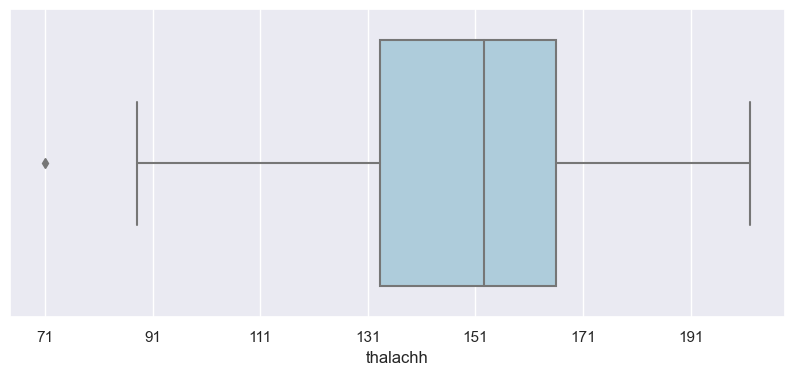

In [32]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='thalachh')
plt.xticks(list(range(int(df.thalachh.min()), int(df.thalachh.max()), 20)));

In [33]:
find_outliers(df, column='thalachh') # threshold 2.0

Empty DataFrame
Columns: [age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall, output]
Index: []

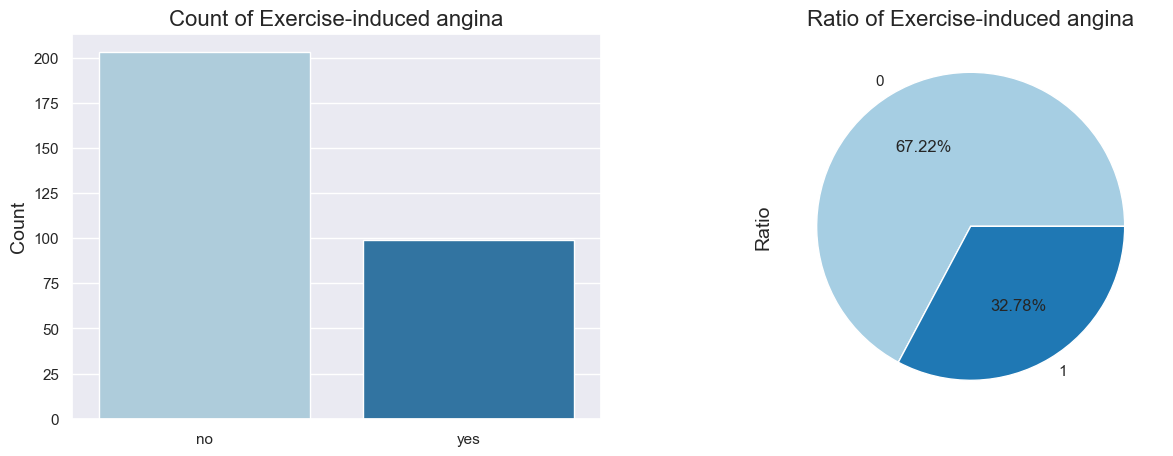

In [34]:
# exng = Exercise-induced angina
# 1: yes,  0: no

labels = ['no', 'yes']

sns.set_palette('Paired')

# Bar Chart
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

ax = sns.countplot(data=df, x=df['exng'], ax=axs[0])

ax.set_ylabel('Count', fontsize=14)
axs[0].set_title("Count of Exercise-induced angina", fontsize=16)
axs[0].set_xticks([0, 1], labels)
axs[0].set_xlabel("", labelpad=12)

# Pie Chart
explode = [0, 0]  
colors = sns.color_palette('Paired')
ax2 = df['exng'].value_counts().plot.pie(explode=explode, colors=colors, ax=axs[1], autopct='%.2f%%')

axs[1].set_title("Ratio of Exercise-induced angina", fontsize=16)
axs[1].set_ylabel('Ratio', fontsize=14)

plt.show()

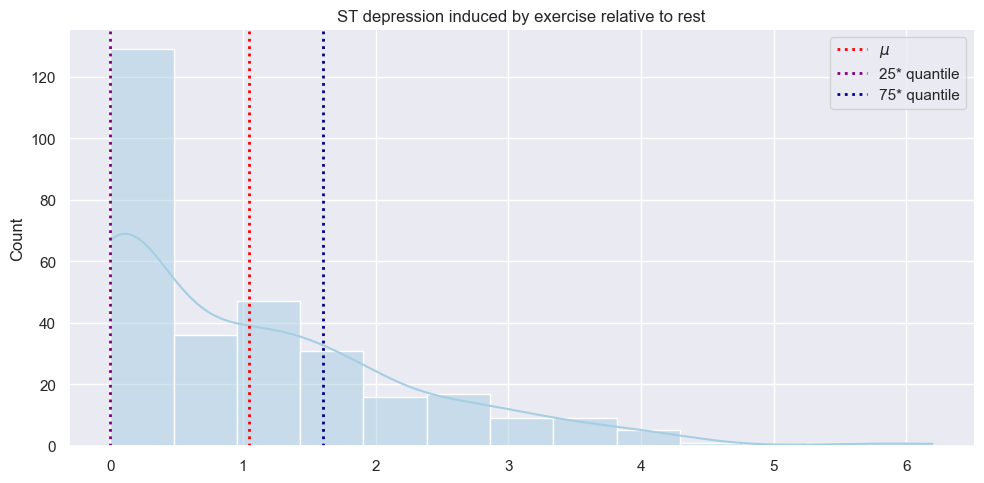

In [35]:
# old peak: ST depression induced by exercise relative to rest
sns.set_palette('Paired')
sns.displot(data=df, x='oldpeak', kde=True, aspect=2, palette='Paired')
plt.axvline(df.oldpeak.mean(), color='red', linestyle=':', label='$\mu$', linewidth=2)
plt.axvline(df.oldpeak.quantile(.25), color='purple', linestyle=':', label='25* quantile', linewidth=2)
plt.axvline(df.oldpeak.quantile(.75), color='darkblue', linestyle=':', label='75* quantile', linewidth=2)
plt.title('ST depression induced by exercise relative to rest')
plt.legend()
plt.xlabel('');

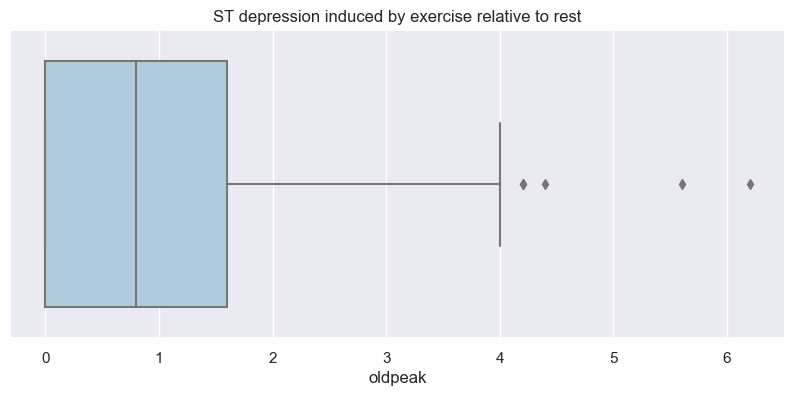

In [36]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='oldpeak')
plt.title('ST depression induced by exercise relative to rest')
plt.show()

In [37]:
find_outliers(df, column='oldpeak')

age     sex              cp  trtbps   chol  fbs                restecg  \
204   62  female  typical angina     160  164.0    0                 normal   
221   55    male  typical angina     140  217.0    0  ST-T wave abnormality   

     thalachh  exng  oldpeak        slp  caa              thall  output  
204       145     0      6.2  unsloping    3  reversible defect       0  
221       111     1      5.6  unsloping    0  reversible defect       0

In [38]:
df.loc[204,'oldpeak'] = df.oldpeak.quantile(.99) + .6
df.loc[221,'oldpeak'] = df.oldpeak.quantile(.99) + .3

In [39]:
find_outliers(df, column='oldpeak')

Empty DataFrame
Columns: [age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall, output]
Index: []

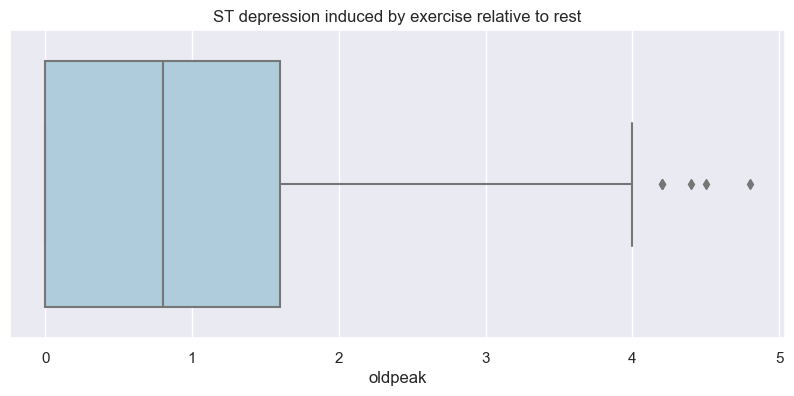

In [40]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='oldpeak')
plt.title('ST depression induced by exercise relative to rest')
plt.show()

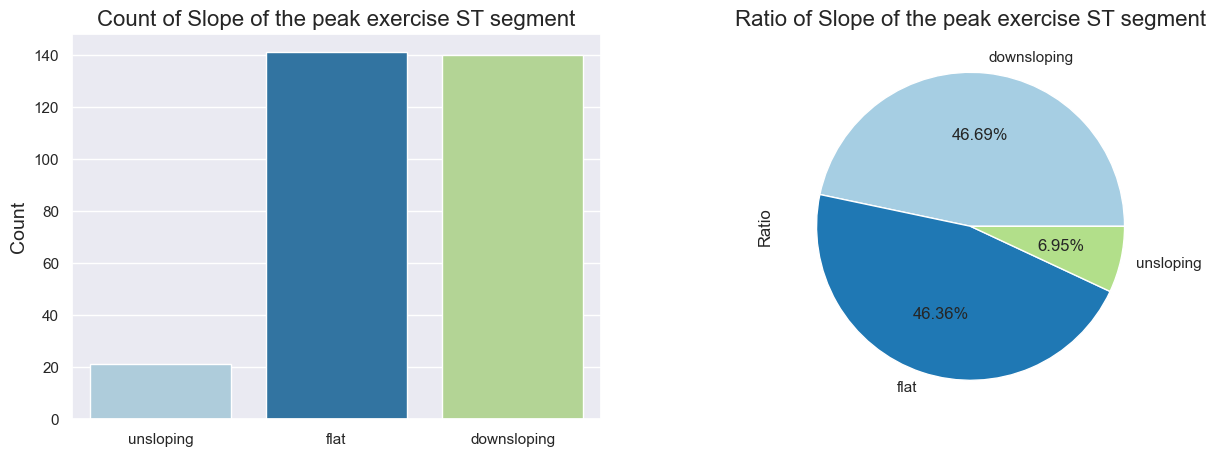

In [41]:
# slp: the slope of the peak exercise ST segment
# 0: unsloping
# 1: flat
# 2: downsloping

labels = ['downsloping', 'flat', 'unsloping']
sns.set_palette('Paired')

# Bar Chart
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

ax = sns.countplot(data=df, x=df['slp'], ax=axs[0])

ax.set_ylabel('Count', fontsize=14)
axs[0].set_title("Count of Slope of the peak exercise ST segment", fontsize=16)
axs[0].set_xticks([2, 1, 0], labels)
axs[0].set_xlabel("")

# Pie Chart
explode = [0, 0, 0]  
colors = sns.color_palette('Paired')
ax2 = df['slp'].value_counts().plot.pie(explode=explode, colors=colors, ax=axs[1], autopct='%.2f%%')

axs[1].set_title("Ratio of Slope of the peak exercise ST segment", fontsize=16)
axs[1].set_ylabel("Ratio")


plt.show()

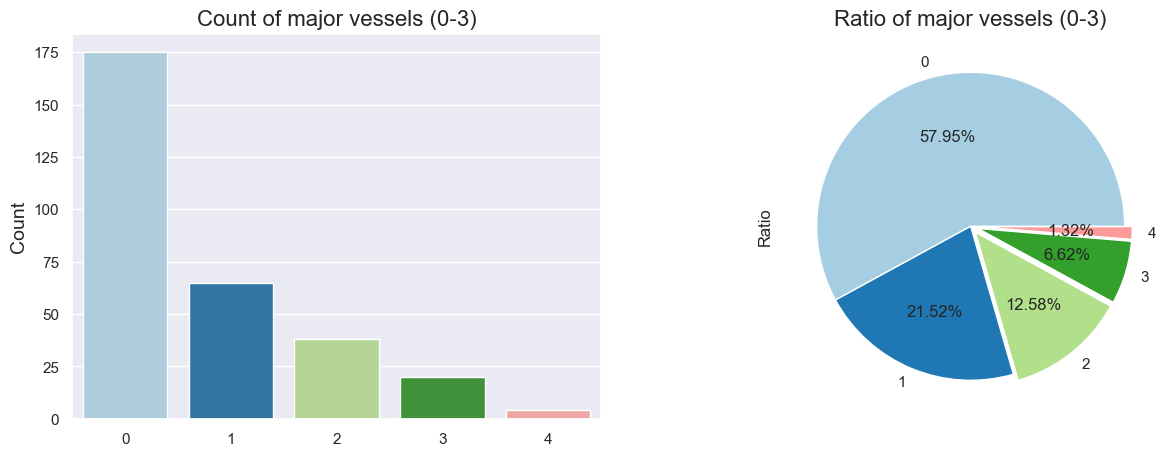

In [42]:
# caa: Number of major vessels (0-3)

sns.set_palette('Paired')

# Bar Chart
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

ax = sns.countplot(data=df, x=df['caa'], ax=axs[0])

ax.set_ylabel('Count', fontsize=14)
axs[0].set_title("Count of major vessels (0-3)", fontsize=16)
axs[0].set_xlabel("")

# Pie Chart
explode = [0, 0, .05, .05, .05]  
colors = sns.color_palette('Paired')
ax2 = df['caa'].value_counts().plot.pie(explode=explode, colors=colors, ax=axs[1], autopct='%.2f%%')

axs[1].set_title("Ratio of major vessels (0-3)", fontsize=16)
axs[1].set_ylabel("Ratio")

plt.show()

* Through research on medical websites on the internet, I have understood that the maximum number of major vessels is 3. However, the fourth is used in reference to special cases or under the choice of a specialized Medical Doctor in the field. In this case, I do not remove the values, considering this as a contextual clarification.

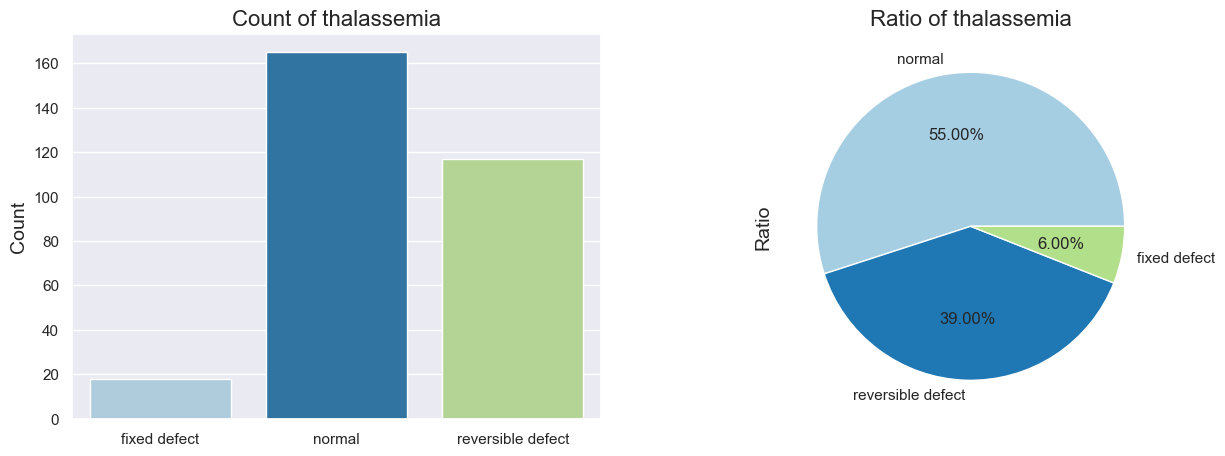

In [43]:
# thall: thalassemia
sns.set_palette('Paired')

# Bar Chart
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

ax = sns.countplot(data=df, x='thall', ax=axs[0], palette='Paired')

axs[0].set_ylabel('Count', fontsize=14)
axs[0].set_title("Count of thalassemia", fontsize=16)
axs[0].set_xlabel('')

# Pie Chart 
colors = sns.color_palette('Paired')
ax2 = df['thall'].value_counts().plot.pie(colors=colors, ax=axs[1], autopct='%.2f%%')

axs[1].set_title("Ratio of thalassemia", fontsize=16)
axs[1].set_ylabel('Ratio', fontsize=14)

plt.show()

---

After examining the data distributions and addressing the outliers, I initiate a cross-variable exploration.

---

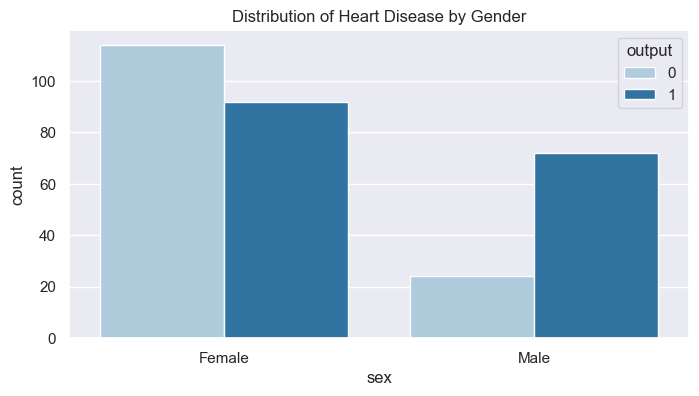

In [44]:
plt.figure(figsize=(8, 4))
sns.countplot(x='sex', data=df, hue='output')
plt.title('Distribution of Heart Disease by Gender')
labels = ["Female", "Male"]
plt.xticks([0,1], labels)
plt.show()

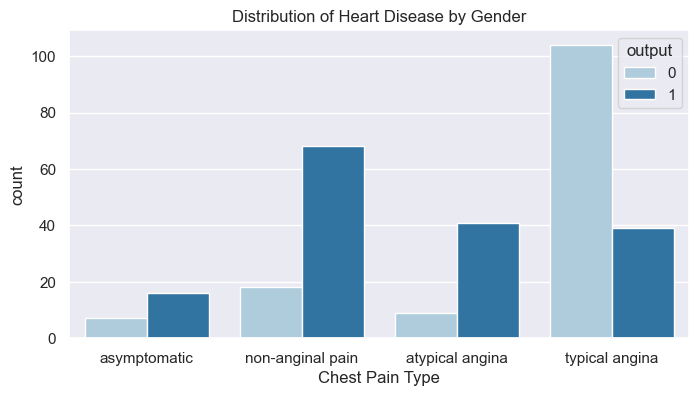

In [45]:
plt.figure(figsize=(8, 4))
sns.countplot(x='cp', data=df, hue='output')
plt.title('Distribution of Heart Disease by Gender')
plt.xlabel('Chest Pain Type')
plt.show()

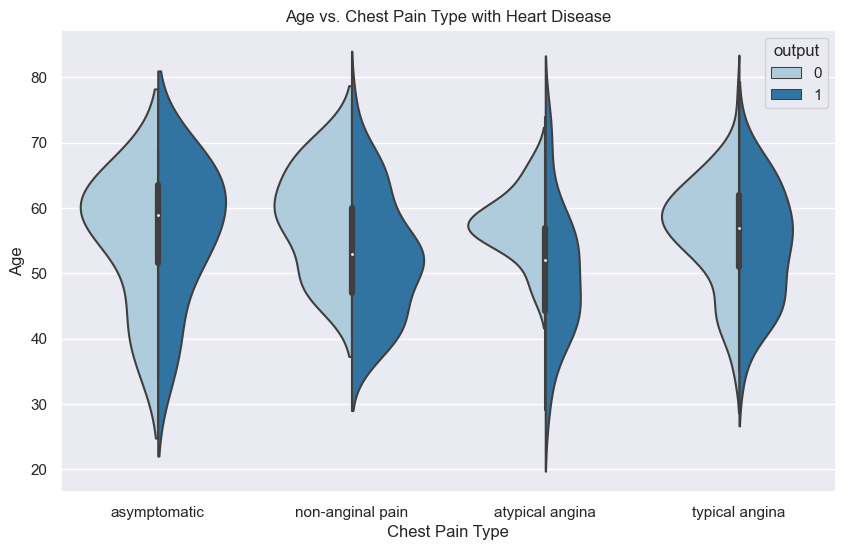

In [46]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='cp', y='age', data=df, hue='output', split=True, palette='Paired')
plt.xlabel('Chest Pain Type')
plt.ylabel('Age')
plt.title('Age vs. Chest Pain Type with Heart Disease')
plt.show()

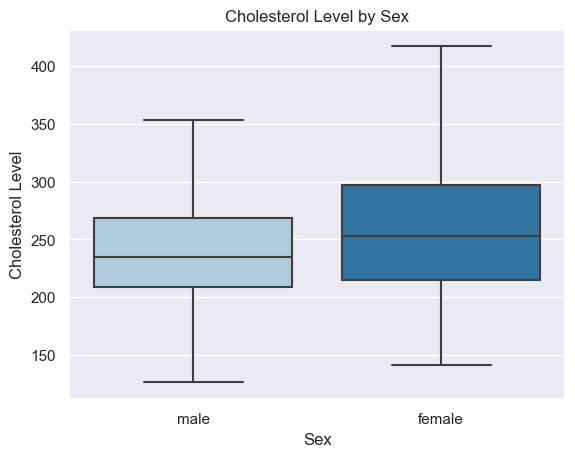

In [47]:
sns.boxplot(x='sex', y='chol', data=df)
plt.xlabel('Sex')
plt.ylabel('Cholesterol Level')
plt.title('Cholesterol Level by Sex')
plt.show()

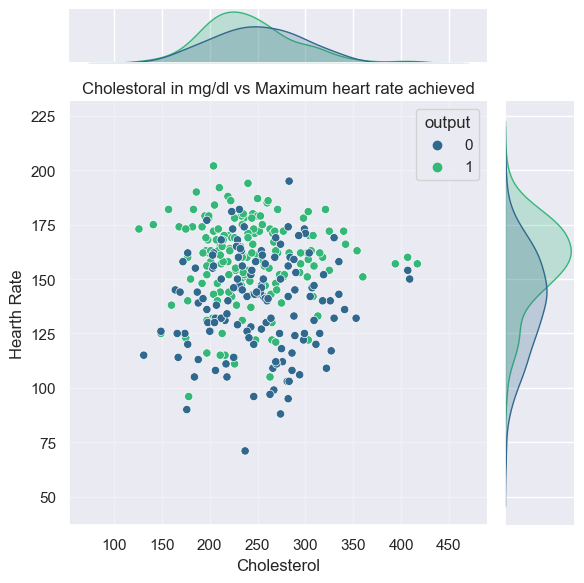

In [48]:
sns.jointplot(x='chol', y='thalachh', data=df, kind='scatter', palette='viridis',hue='output')
plt.title('Cholestoral in mg/dl vs Maximum heart rate achieved')
plt.ylabel('Hearth Rate')
plt.xlabel('Cholesterol')
plt.grid(alpha=.3)
plt.tight_layout()

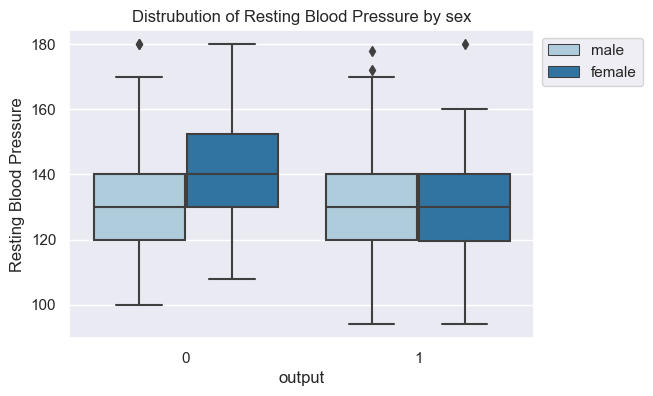

In [49]:
plt.figure(figsize=(6,4))
sns.boxplot(df,x="output", y="trtbps", hue="sex")
plt.title('Distrubution of Resting Blood Pressure by sex')
plt.ylabel('Resting Blood Pressure')
plt.legend(bbox_to_anchor=(1.25,1))
plt.show()

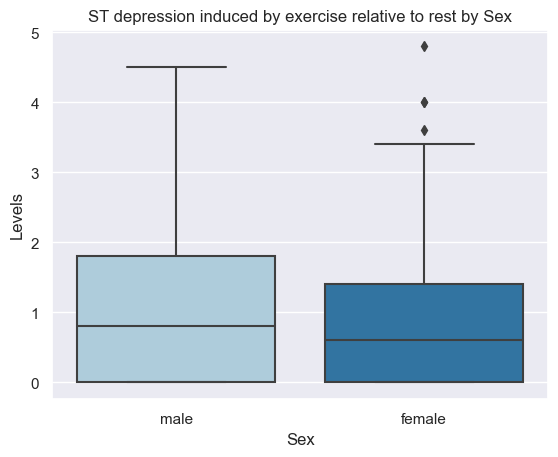

In [50]:
sns.boxplot(x='sex', y='oldpeak', data=df)
plt.xlabel('Sex')
plt.ylabel('Levels')
plt.title('ST depression induced by exercise relative to rest by Sex')
plt.show()

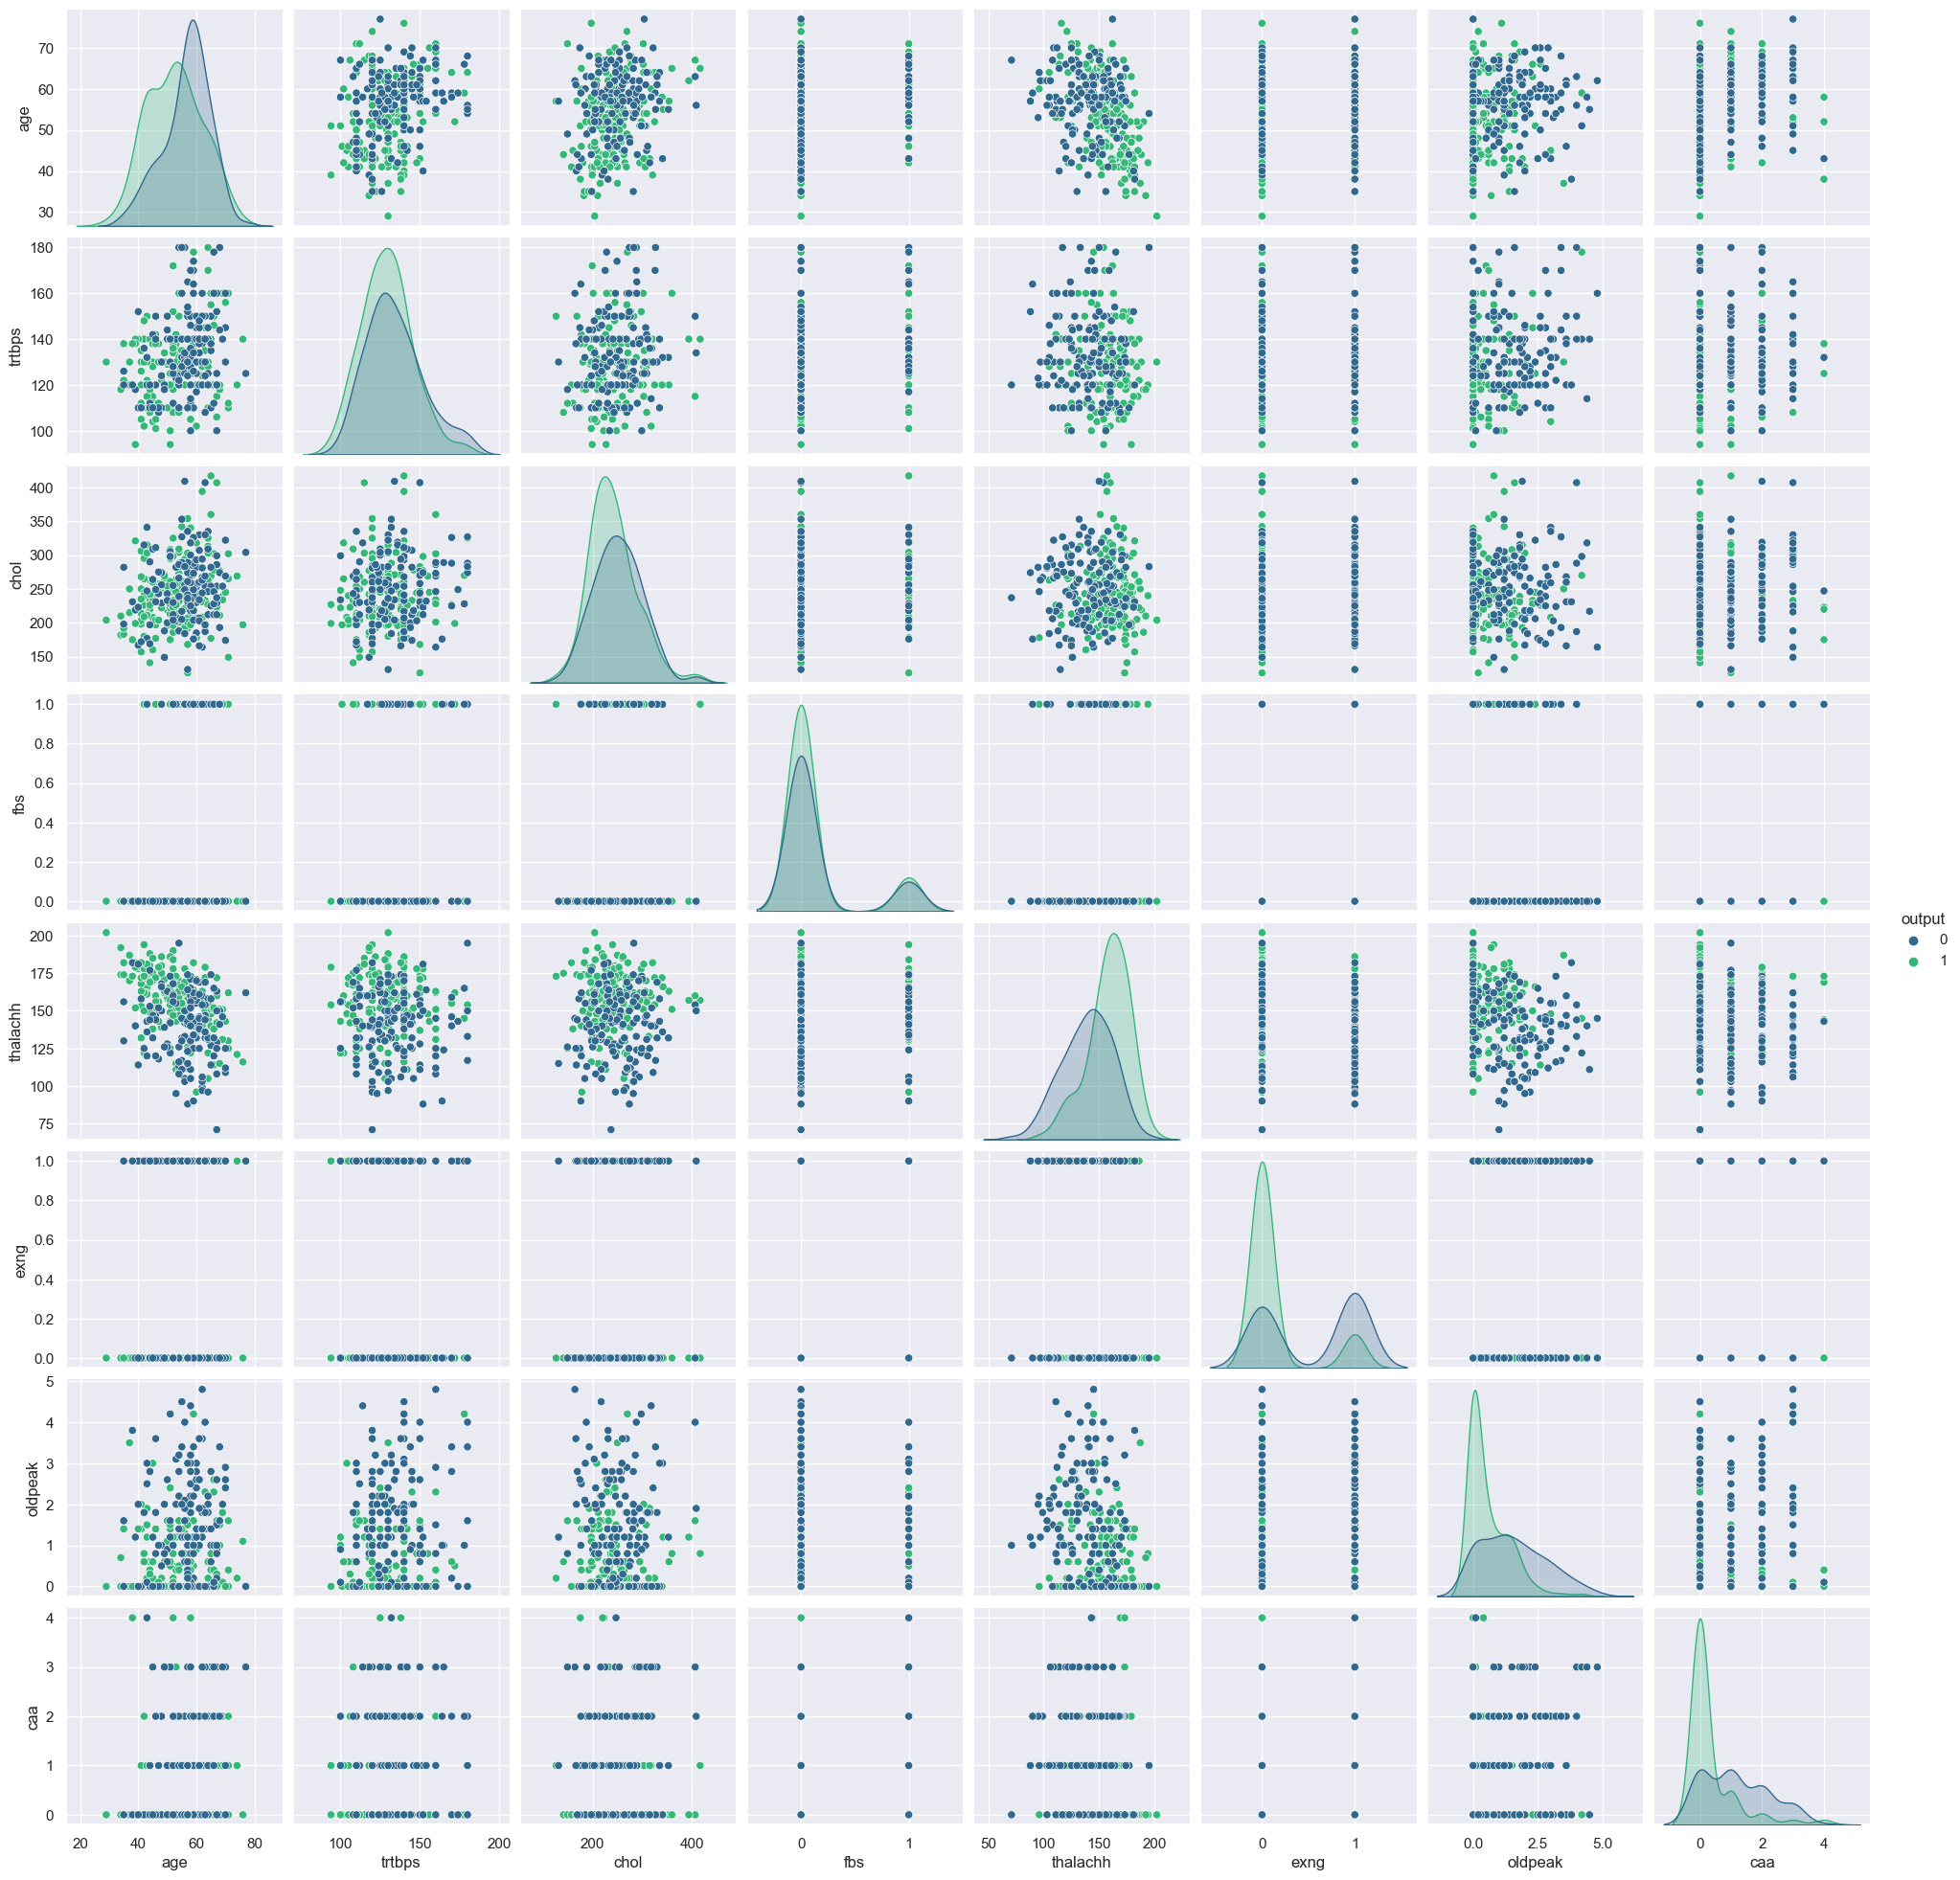

In [51]:
sns.pairplot(data=df, hue='output', palette="viridis")

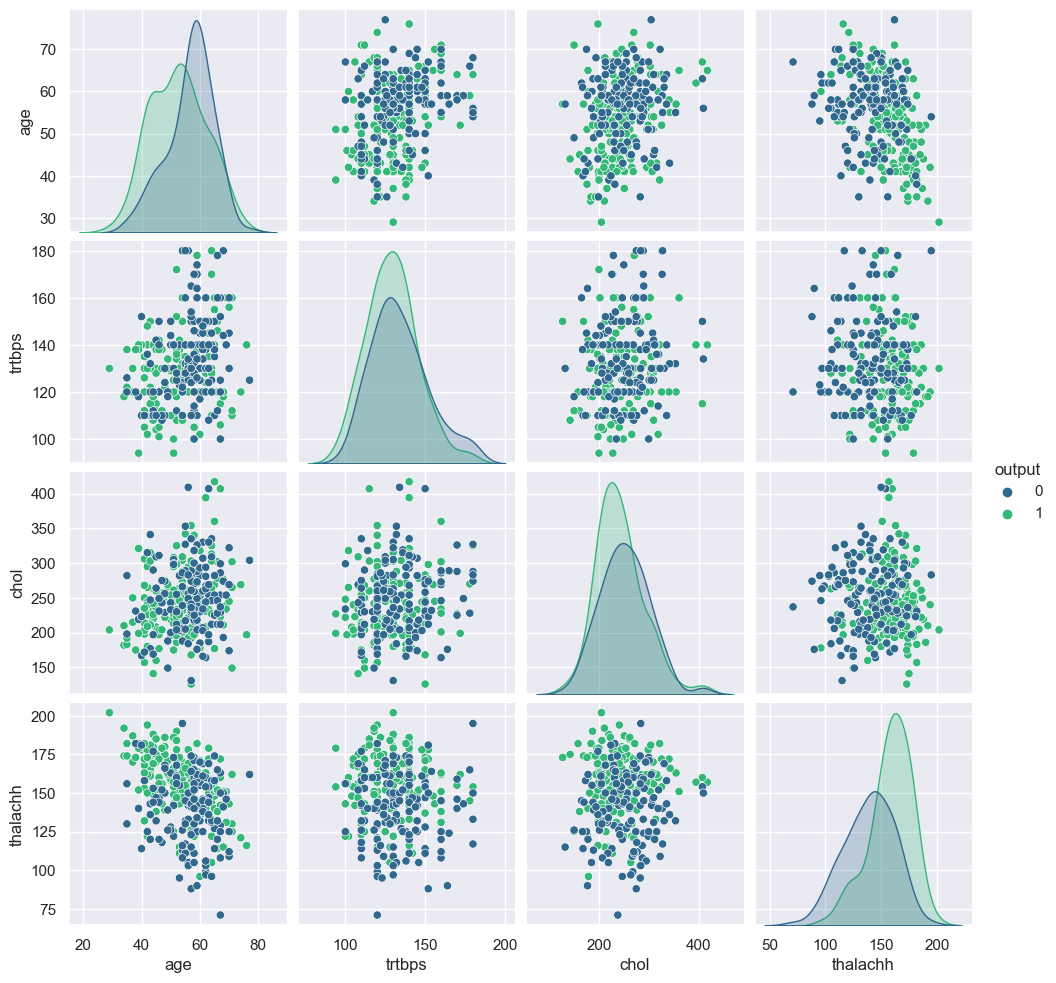

In [52]:
sns.pairplot(data=df[['age', 'trtbps', 'chol', 'thalachh', 'output']], hue='output', palette="viridis")

<a id="DataPreprocessing"></a>
<h2 style="text-align: center;"><strong>Data Preprocessing</strong></h2>

In [53]:
data = df.copy()

In [54]:
cat_col = [col for col in df.columns if df[col].dtype == np.object_]
num_col = [col for col in df.columns if df[col].dtype in [np.int64, np.float64, np.int32, np.float32]]
num_col.remove('output')

dummy_variables = pd.get_dummies(data, columns=cat_col, drop_first=False, dtype=int)

In [55]:
scaler = StandardScaler()

scaled_num = scaler.fit_transform(data[num_col])
scaled_num_df  = pd.DataFrame(scaled_num, columns=num_col)

In [56]:
dummy_variables = dummy_variables.drop(num_col, axis = 1)

processed_df = pd.concat([dummy_variables, scaled_num_df], axis = 1)

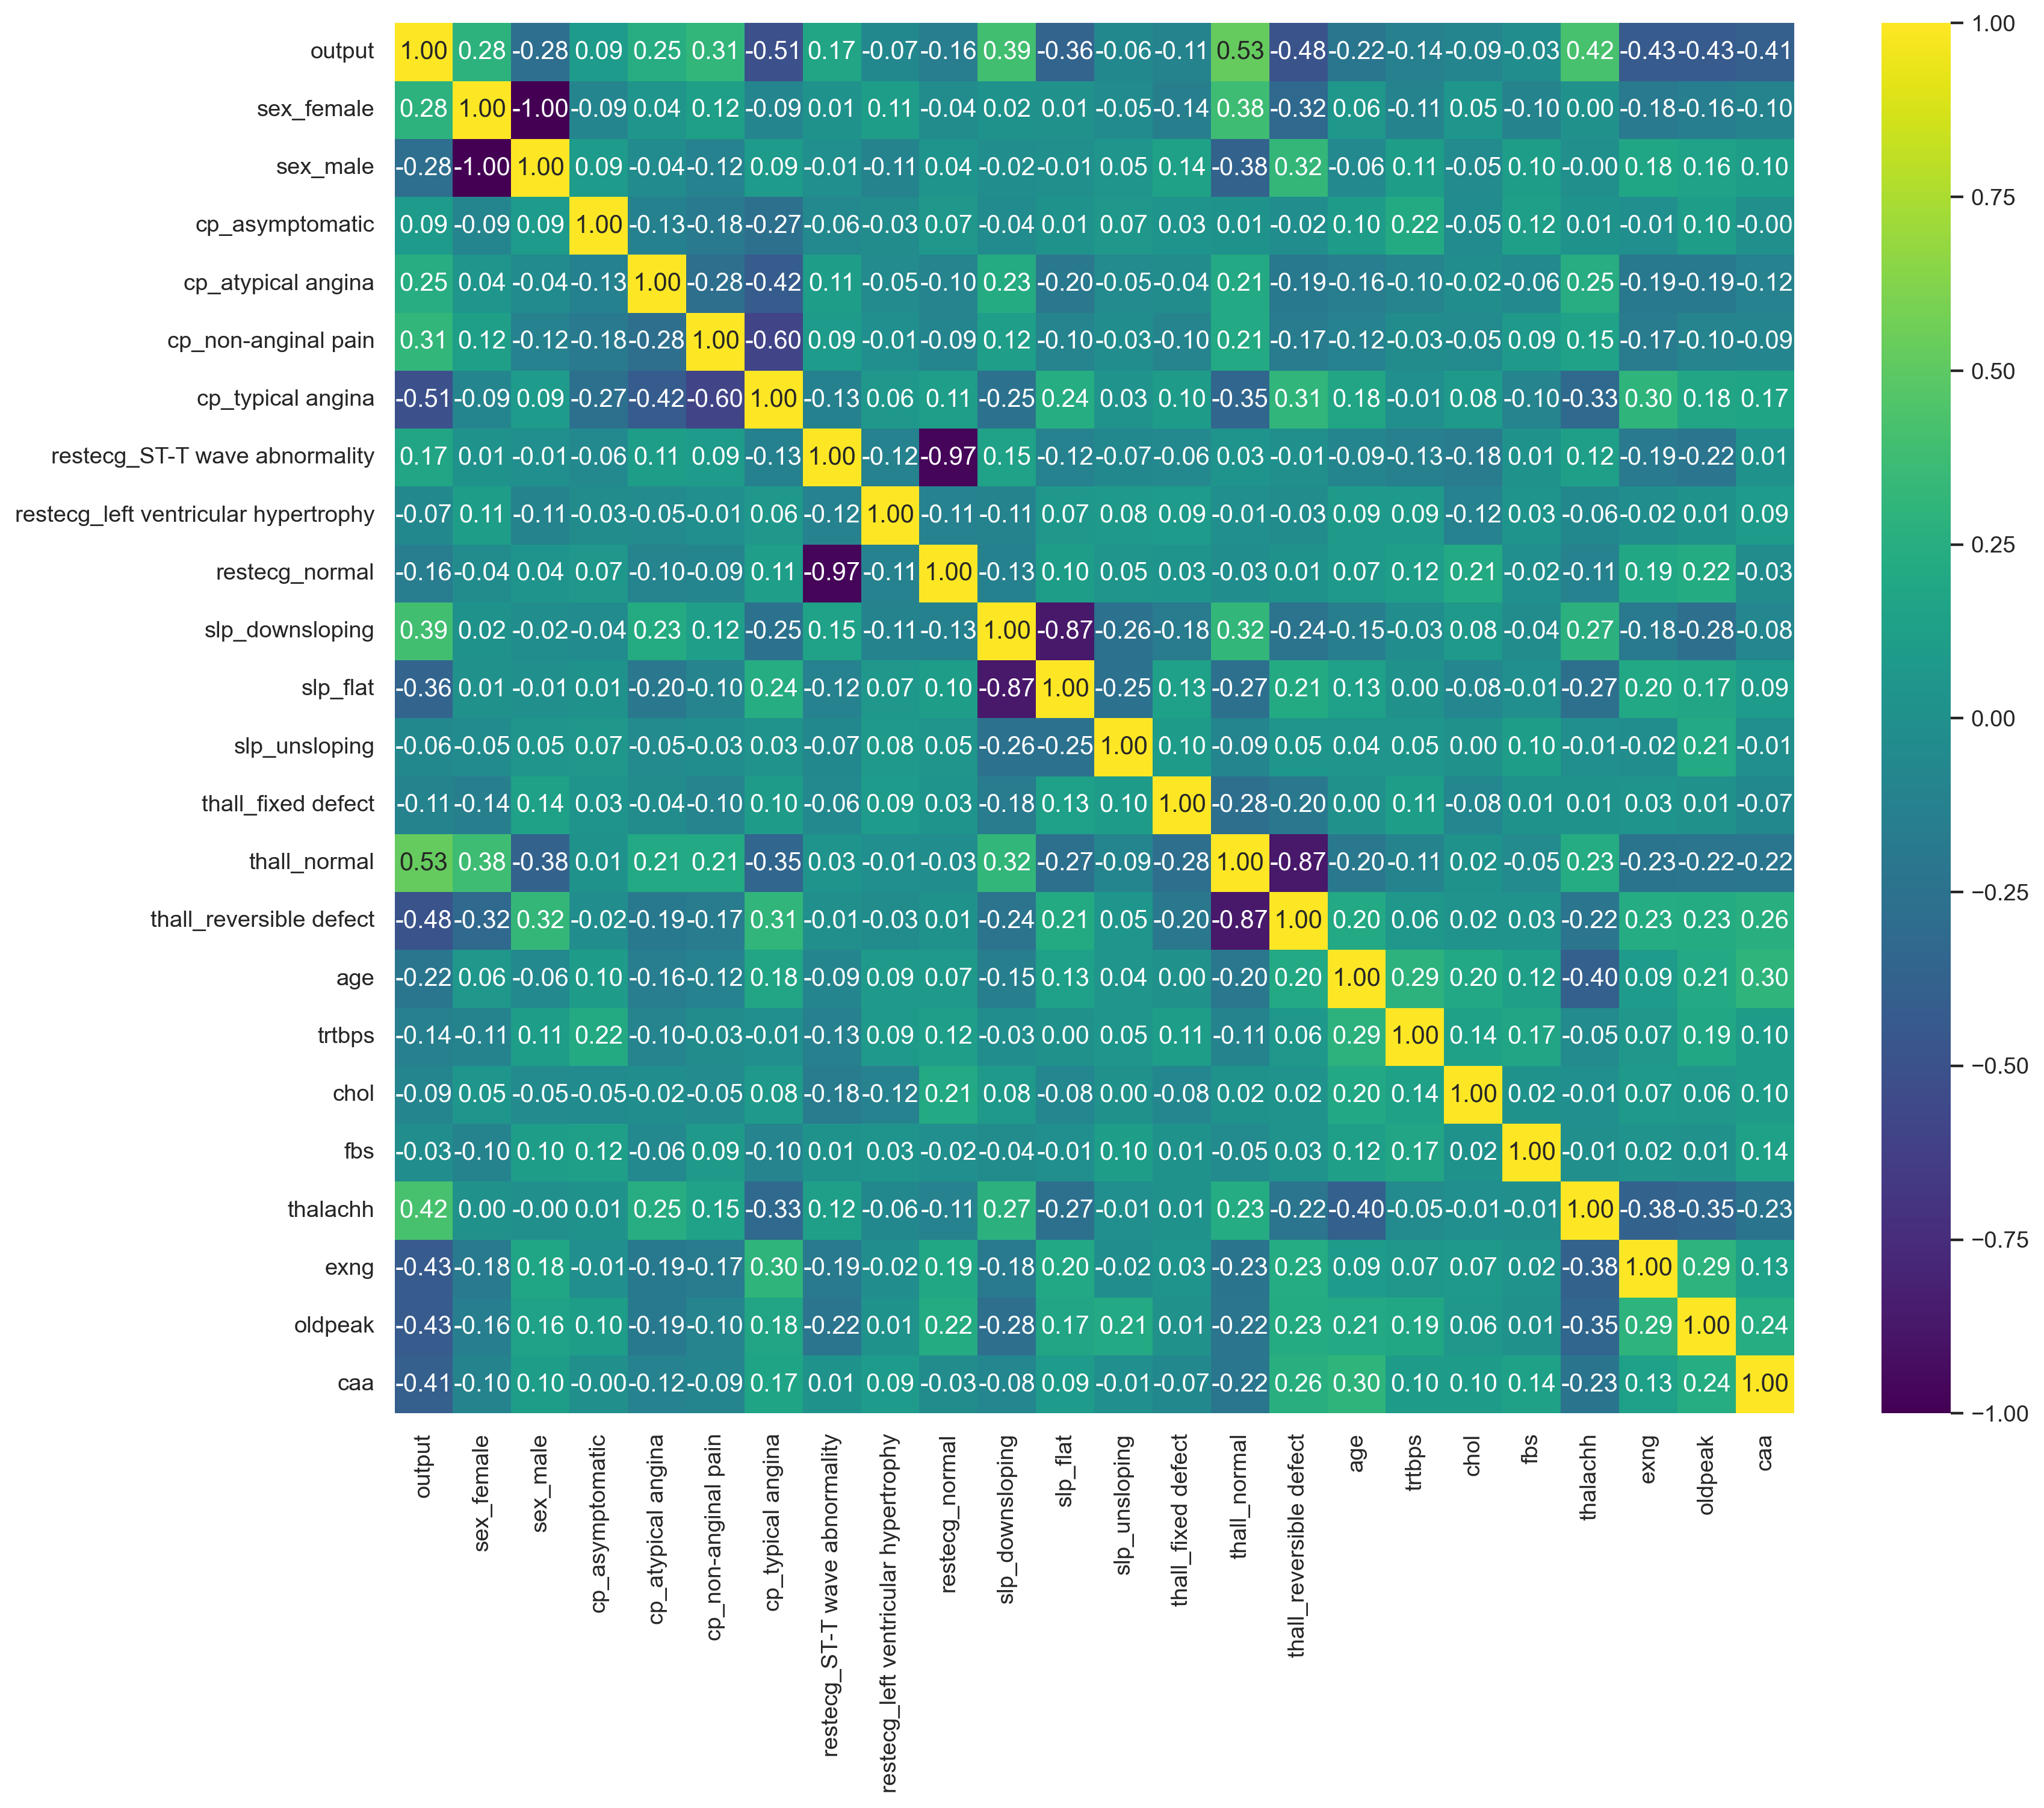

In [57]:
plt.figure(figsize=(15,12), dpi=250)
sns.heatmap(processed_df.corr(), annot=True, fmt='.2f', cmap='viridis')
plt.show()

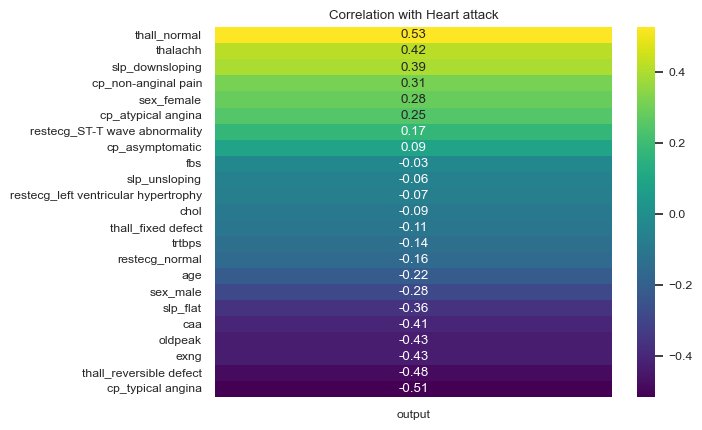

In [58]:
corr = processed_df.corr()
target_corr = corr['output'].drop('output')

target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="viridis", annot=True, fmt='.2f')
plt.title('Correlation with Heart attack')

plt.show()

In [59]:
processed_df.dropna(inplace=True)

---

After completing data inspections and various stages of data preprocessing, I proceed to split the data set X and the target variable y.

---

In [60]:
X = processed_df.drop('output', axis=1)
y = processed_df['output']

### Split the data into Training, Testing, and Validation sets.

In [61]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)

<a id="ModelEvaluation"></a>
<h2 style="text-align: center;"><strong>Model Evaluation</strong></h2>

In [62]:
def classification_models():
    models = []
    models.append(('RandomForest', RandomForestClassifier(random_state=10)))
    models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state=10)))
    models.append(('AdaBoost', AdaBoostClassifier(random_state=10)))
    models.append(('Bagging', BaggingClassifier(random_state=10)))
    models.append(('ExtraTrees', ExtraTreesClassifier(random_state=10)))
    models.append(('XGBClassifier', XGBClassifier(random_state=10)))
    models.append(('svc', SVC(random_state=10, kernel='rbf')))
    models.append(('LogisticRegression', LogisticRegression(random_state=10)))
    
    return models

models = classification_models()

In [63]:
def model_fit_evaluate(models, X_train, y_train, X_test, y_test):
    # fit
    for model in models:
        print(f"{model[0]}\n")
        model[1].fit(X_train, y_train)
        y_pred = model[1].predict(X_test)
        
        # Evaluation
        cm = confusion_matrix(y_test, y_pred)
        cr = classification_report(y_test, y_pred)
    
        # show
        print(f"""
Confusion Matrix:\n{cm}\n
                classification report:\n{cr}\n
{"-"*60}
        """)

In [64]:
model_fit_evaluate(models, X_train, y_train, X_test, y_test)

RandomForest


Confusion Matrix:
[[22  5]
 [ 5 28]]

                classification report:
              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81        27
         1.0       0.85      0.85      0.85        33

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60


------------------------------------------------------------
        
GradientBoostingClassifier


Confusion Matrix:
[[22  5]
 [ 4 29]]

                classification report:
              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83        27
         1.0       0.85      0.88      0.87        33

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60


------------------------------------------------------------
        
AdaBoo

<a id="HyperParameterTuning"></a>
<h2 style="text-align: center;"><strong>Hyper Parameter Tuning</strong></h2>

In [65]:
model1 = XGBClassifier()

param_grid = {
    "n_estimators": [10, 50, 100, 300],
    "max_depth": [2,3,4,5,6,7,8],
    "max_leaves": [0, 1, 2, 3, 4],
    "learning_rate": [.09,.1,.2,.3,.4],
    "subsample": [0, .1,.2,.4,.6,.8],
    "gamma": [0.01, .1, .3, .5, .8, 1]
}

grid1 = GridSearchCV(estimator=model1, param_grid=param_grid, n_jobs=-1)
grid1.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.01, 0.1, 0.3, 0.5, 0.8, 1],
                         'learning_rate': [0.09, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'max_leaves': [0, 1, 2, 3, 4],
                         'n_estimators': [10, 50, 100, 300],
                         'subsample': [0, 0.1, 0.2, 0.4, 0.6, 0.8]})

In [66]:
best_param1 = grid1.best_params_
best_param1

{'gamma': 0.5,
 'learning_rate': 0.3,
 'max_depth': 2,
 'max_leaves': 0,
 'n_estimators': 50,
 'subsample': 0.2}

In [67]:
xgb = XGBClassifier(**best_param1)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=0,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [68]:
feature_importances = xgb.feature_importances_.ravel()  
feature_imp = pd.DataFrame(data=feature_importances, index=X_train.columns.to_list(), columns=['importance'])
feature_imp = feature_imp.sort_values('importance', ascending=False)
feature_imp

importance
cp_non-anginal pain                     0.101390
thall_normal                            0.089646
thall_reversible defect                 0.086097
thalachh                                0.083822
chol                                    0.081812
restecg_ST-T wave abnormality           0.081358
slp_flat                                0.073448
cp_typical angina                       0.063478
caa                                     0.061504
trtbps                                  0.054397
oldpeak                                 0.051847
exng                                    0.045539
slp_downsloping                         0.043956
age                                     0.042770
sex_female                              0.038934
thall_fixed defect                      0.000000
sex_male                                0.000000
restecg_normal                          0.000000
fbs                                     0.000000
restecg_left ventricular hypertrophy    0.000000
cp_atypical angina                      0.000000
cp_asymptomatic                         0.000000
slp_unsloping                           0.000000

In [69]:
y_pred1 = xgb.predict(X_val)

In [70]:
print(classification_report(y_val, y_pred1))

              precision    recall  f1-score   support

         0.0       0.96      0.82      0.88        28
         1.0       0.86      0.97      0.91        33

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61



In [71]:
model2 = LogisticRegression(max_iter=1000)

param_grid = {
    "penalty": ['l1', 'l2', 'elasticnet'],
    "C": [0.001, 0.01, .1, .3, .5, .8],
    "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    
}

grid2 = GridSearchCV(estimator=model2, param_grid=param_grid, n_jobs=-1)
grid2.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.3, 0.5, 0.8],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [72]:
best_param2 = grid2.best_params_
best_param2

{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [73]:
lr = LogisticRegression(**best_param2)
lr.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [74]:
y_pred2 = lr.predict(X_val)

In [75]:
print(classification_report(y_val, y_pred2))

              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85        28
         1.0       0.86      0.91      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [76]:
model3 = BaggingClassifier()

param_grid = {
    "n_estimators": [5, 10, 20, 50, 80, 100, 200],
    "max_samples": [1, 2, 3, 4, 5, 6, 7, 8],
    "max_features": [1, 2, 3, 4, 5, 6, 7, 8],
    "bootstrap": [True, False] 
}

grid3 = GridSearchCV(estimator=model3, param_grid=param_grid, n_jobs=-1)
grid3.fit(X_train, y_train)

GridSearchCV(estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_samples': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [5, 10, 20, 50, 80, 100, 200]})

In [77]:
best_param3 = grid3.best_params_
best_param3

{'bootstrap': False, 'max_features': 4, 'max_samples': 5, 'n_estimators': 200}

In [78]:
bc = BaggingClassifier(**best_param3)
bc.fit(X_train, y_train)

BaggingClassifier(bootstrap=False, max_features=4, max_samples=5,
                  n_estimators=200)

In [79]:
y_pred3 = bc.predict(X_val)

In [80]:
print(classification_report(y_val, y_pred3))

              precision    recall  f1-score   support

         0.0       1.00      0.68      0.81        28
         1.0       0.79      1.00      0.88        33

    accuracy                           0.85        61
   macro avg       0.89      0.84      0.84        61
weighted avg       0.88      0.85      0.85        61



## Model Comparison

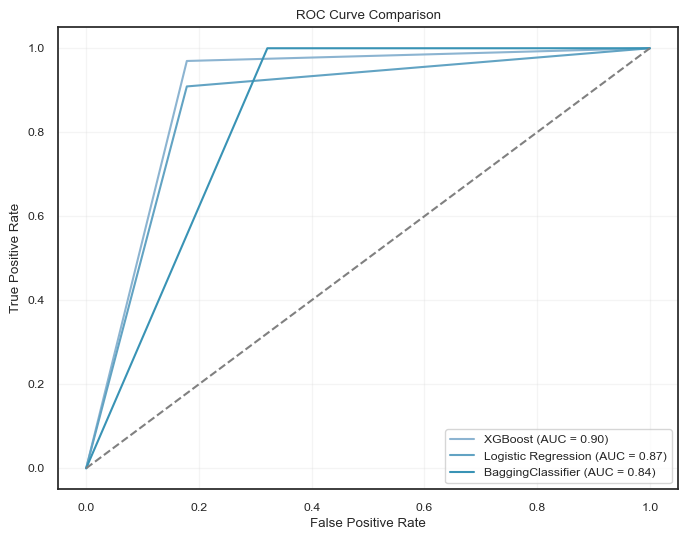

In [83]:
# Compute ROC curves for the three models
fpr_xgb, tpr_xgb, _ = roc_curve(y_val, y_pred1)
fpr_lr, tpr_lr, _ = roc_curve(y_val, y_pred2)
fpr_bagging, tpr_bagging, _ = roc_curve(y_val, y_pred3)

# Calculate the area under the ROC curve (ROC AUC)
roc_auc_xgb = roc_auc_score(y_val, y_pred1)
roc_auc_lr = roc_auc_score(y_val, y_pred2)
roc_auc_bagging = roc_auc_score(y_val, y_pred3)

# Create the ROC Curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_bagging, tpr_bagging, label=f'BaggingClassifier (AUC = {roc_auc_bagging:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(alpha=.2)
plt.show()

<a id="FinalModel"></a>
<h2 style="text-align: center;"><strong>Final Model</strong></h2>

As we can see from the above graph, the **ROC** curve of the **XGBoost model** performs slightly better than the others. 

Below, I provide the classification report for the model, and finally, I will move on to the notebook's conclusions.

In [84]:
print(f"Classification report for the XGBoost model:\n\n{classification_report(y_val, y_pred1)}")

Classification report for the XGBoost model:

              precision    recall  f1-score   support

         0.0       0.96      0.82      0.88        28
         1.0       0.86      0.97      0.91        33

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61



<a id="Conclusions"></a>
<h2 style="text-align: center;"><strong>Conclusions</strong></h2>

In [85]:
print(f"""
      For The XGBoost\n  
      There are {len(feature_imp[feature_imp['importance']>0])} Feature greater then 0, 
      and {len(feature_imp[feature_imp['importance']<=0])} Equal to 0. \n\n
      
      The Feature most involved are:\n 
      {feature_imp[feature_imp['importance']>0]} \n
      
      On the other hand, the variables that had no influence on the model are:\n
      {feature_imp[feature_imp['importance']<=0]}
      """)


      For The XGBoost
  
      There are 15 Feature greater then 0, 
      and 8 Equal to 0. 


      
      The Feature most involved are:
 
                                     importance
cp_non-anginal pain              0.101390
thall_normal                     0.089646
thall_reversible defect          0.086097
thalachh                         0.083822
chol                             0.081812
restecg_ST-T wave abnormality    0.081358
slp_flat                         0.073448
cp_typical angina                0.063478
caa                              0.061504
trtbps                           0.054397
oldpeak                          0.051847
exng                             0.045539
slp_downsloping                  0.043956
age                              0.042770
sex_female                       0.038934 

      
      On the other hand, the variables that had no influence on the model are:

                                            importance
thall_fixed defect                 

In conclusion, the **XGBoost model** performs quite well when there is a risk of a heart attack. The available data was limited, and this could potentially have a negative impact on the results.

Certainly, to **improve the model**, more data should be added. However, based on what we have found so far, the **XGBoost** model does a very good job in predicting using this data.